<a href="https://colab.research.google.com/github/jessika2018/Data-analysis-Master---ashrafieh-sales/blob/main/category_apriori_association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Market Basket
The market basket is a list of some fixed items that are used to track the inflation and overall price movements of a specific market in an economy. In other words, it is a basket that contains a set of standard goods or services that people commonly buys.

Market Basket Analysis
Market basket analysis is a method or technique of data analysis for retail and marketing purpose. Market basket analysis is done to understand the purchasing behavior of customers. MBA (Market Business Analysis) is used to uncover what items are frequently brought together by the customer. Market basket analysis leads to effective sales and marketing.Market basket analysis measures the co-occurrence of products and services. Market basket analysis is only considered when there is a transaction between two or more items.

Eg:if a customer is buying bread then he is likely to buy butter, jam or milk to compliment bread.

Applications of Market Basket Analysis
Market basket analysis is applied to various fields of the retail sector in order to boost sales and generate revenue by identifying the needs of the customers and make purchase suggestions to them.

Cross-selling is basically a sales technique in which seller suggests some related product to a customer after he buys a product.
Product Placement: It refers to placing the complimentary (pen and paper)and substitute goods (tea and coffee) together so that the customer addresses the goods and will buy both the goods together.
MBA has also been used in the field of healthcare for the detection of adverse drug reactions. It produces association rules that indicates what all combinations of medications and patient characteristics lead to ADRs.
Fraud Detection: Market basket analysis is also applied to fraud detection. It may be possible to identify purchase behavior that can associate with fraud on the basis of market basket analysis data that contain credit card usage
How Market Based Analysis Works
In order to make it easier to understand, think of Market Basket Analysis in terms of shopping at a supermarket. Market Basket Analysis takes data at transaction level, which lists all items bought by a customer in a single purchase. The technique determines relationships of what products were purchased with which other product(s). These relationships are then used to build profiles containing If-Then rules of the items purchased.

The rules are written as :

if {A} then {B} i.e. {A} => {B}

The If part of the rule (the {A} above) is known as the antecedent and the THEN part of the rule is known as the consequent (the {B} above). The antecedent is the condition and the consequent is the result.

Assosciation Rules
Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

Let I={i1,i2,i3,…,in} be a set of n attributes called items and D={t1,t2,…,tn} be the set of transactions. It is called database. Every transaction, ti in D has a unique transaction ID, and it consists of a subset of itemsets in I.

Assosciation rules are produced using algorithms like :

Apriori Algorithm
Eclat Algorithm
FP-growth Algorithm
A rule can be defined as an implication, X⟶Y where X and Y are subsets of I(X,Y⊆I), and they have no element in common. X and Y are the antecedent and the consequent of the rule, respectively.

Eg: {Bread,Egg}=> {Milk} ItemSet={Bread,Egg,Milk}

There are various metrics in place to help us understand the strength of assosciation between antecedent and consequent:

Support
Confidence
Lift or Correlation or interest
Leverage
Conviction
Support
It gives an idea of how frequent an itemset is in all the transactions.To say in formal terms it's the fraction of total no. of transactions in which the itemset occurs.We refer to an itemset as a "frequent itemset" if you support is larger than a specified minimum-support threshold.

supp(X−>Y)=(TransactionscontainingbothXandY)(TotalNo.oftransactions)
 
Range:[0,1] Value of support helps us identifying the rules worth for future analysis.

Confidence
It defines the likelihood of occurence of consequent on the cart given that cart already has antecedent.It signifies the likelihood of item Y being purchased when item X is purchased.

confidence(X−>Y)=support(X−>Y)support(X)
 
Range:[0,1]

If confidence is 0.75 then that imples that 75%of transactions containing X also contain Y .It can also be interpreted as the conditional probability P(Y|X), i.e, the probability of finding the itemset Y in transactions given the transaction already contains X.

It has a major drawback i.e. It only takes into account the popularity of the itemset X and not the popularity of Y. If Y is equally popular as X then there will be a higher probability that a transaction containing X will also contain Y thus increasing the confidence. To overcome this drawback there is another measure called lift.

Lift
Lift gives the rise in the probability of having {Y} on the cart with the knowlede of {X} being present over the probability of having {Y} on the cart without knowlede about presence of {X}.

Lift(X−>Y)=confidence(X−>Y)support(Y)
 
Range:[0,Infinity]

It can simply be considered as correlation between the antecedent and consequent.If the value of lift is greater than 1, it means that the itemset Y is likely to be bought with itemset X, while a value less than 1 implies that itemset Y is unlikely to be bought if the itemset X is bought.

Levarage or Piatetsky-Snapiro
It computes the difference between the observed frequency of X & Y appearing together and the frequency that we would expect if A and C are independent.

Leverage(X−>Y)=support(X−>Y)−support(X)∗support(Y)
 
Range:[-1,1]

If X,Y are positively correlated then we get leverage>0 ,we need such type of rules.
If X,Y are negatively correlated then we get leverage<0.
If X,y are independent , then we get leverage = 0.

Conviction
It can be interpreted as the ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.

Conviction(X−>Y)=support(Y)confidence(X−>Y)
 
Please mark in the above equation Y means it is Y bar i.e. a bar on Y

Range:[0,Infinity]

A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

Apriori Algorithm
Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. It is devised to operate on a database containing a lot of transactions, for instance, items brought by customers in a store.Association rule learning is a prominent and a well-explored method for determining relations among variables in large databases.

Rule - generation is a two step process. First is to generate frequent item set and second is to generate rules from the considered itemset.

1.Generating Frequent Itemset:
One approach to find the frequent itemsets is to check all possible subsets of the given item set and check the support value of each itemset and consider only those that have support values greater than the minimum threshold support value.

Here the Apriori uses the result of antimontone property of support and makes the generation of frequent Item set faster by reducing the search space.It has two principles:

All subsets of a frequent itemset must be frequent
Similarly, for any infrequent itemset, all its supersets must be infrequent too
Apriori principle allows us to prune all supersets of an itemset which does nogt satisfy the minimum threshold condition for support.For example if {Milk,Bread} does not satify our threshold value , then the superset of {Milk,Bread} will also not cross the threshold value there by we can just prune them away i.e. do not consider the itemsets that wil be generated from the {Milk,Bread}.

Totally 3 major steps are involved here:

Generate all frequent itemsets each satisfying the minimum threshold and having only one item let it be L1. Next use self join and generate all possible combinations of L1 and now let the result be L2.
At each step as we keep on generating candidate itemsets, for each candidate we scan entire database so as to know its support and remove the candidates that do not satisfy minimum threshold
Here To reduce the no of comparisions, store the generated candidate items in a Hash Tree,Instead of matching each of candidate itemsets against each transaction,match each transaction with the candidates in hash tree(there by we can enhance the speed of apriori using this method)
In similar way create Lk from Lk-1 until the point where we are unable to apply selfjoin.
This approach of extending a frequent itemset one at a time is called the “bottom up” approach.



2.Generating all possible rules from Frequent Itemsets
If n items are in set I , no of possible assosciation rules possible are 3<supn</sup>- 2n+1 + 1.It becomes computationally expensive to generate all the rules and there is no meaning in genearting all that many no. of rules.

So apriori simplifies this approach by following some methodology,

Rules are formed by binary partition of each itemset.From a list of all possible candidate rules, we aim to identify rules that fall above the minimum confidence level.Just like antimontone property of support, confidence of rules generated from same itemset also follow the anti montone property. It's antimontone w.r.t no. of elements in consequent.

=> CONF(A,B,C -> D) >= CONF(B,C -> A,D) >= CONF(C -> A,B,D)

On the basis of this rules are generated.

If you want to refer further on Advanced Apriori Algorithms, Please refer to Advanced Apriori Algorithms.

Apriori uses a breadth-first search strategy to count the support of itemsets and uses a candidate generation function which exploits the downward closure property of support.

Pros of the Apriori algorithm:

It is an easy-to-implement and easy-to-understand algorithm.
It can be used on large itemsets.
Cons of the Apriori Algorithm:
Sometimes, it may need to find a large number of candidate rules which can be computationally expensive.
Calculating support is also expensive because it has to go through the entire database.
Now let's work on a dataset ...

In [118]:
pip install squarify

In [119]:
#Data manipulation libraries
import pandas as pd
import numpy as np


#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib


#for market basket analysis (using apriori)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

#for preprocessing
from mlxtend.preprocessing import TransactionEncoder


#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [120]:
import mlxtend
print(mlxtend.__version__)

0.18.0


In [121]:
pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [177]:
df = pd.read_excel('/content/Saida_Category.xlsx',names=['Category'])

In [178]:
# df

In [179]:
# df.columns 

In [180]:
# df.value
# df.tail

In [181]:

df.shape

(1000, 1)

In [182]:
data = list(df["Category"].apply(lambda x:x.split(';')))
data 

[['beverages & ready to eat', 'alcohol'],
 ['frozen'],
 ['beverages & ready to eat', 'beverages & ready to eat'],
 ['health & beauty', 'frozen'],
 ['chilled'],
 ['beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat'],
 ['meal solutions',
  'cleaning',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet',
  'pet'],
 ['beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat',
  'frozen',
  'alcohol'],
 ['meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'meal solutions',
  'beverages & ready to eat',
  'beverages & ready to eat',
  'beverages & ready to eat',
  '

In [183]:
from mlxtend.preprocessing import TransactionEncoder

In [184]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,...,alcohol,baby,beverages & ready to eat,chilled,cleaning,frozen,health & ...,health & beauty,m...,meal solutions,pet,tobacco
0,False,True,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,True,False,False,True,False,False,False,False,False,False
996,False,False,False,True,False,False,False,False,False,False,False,False,False
997,False,False,False,True,True,False,True,False,False,False,False,False,True
998,False,False,False,True,True,True,False,False,True,False,True,False,False


<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'beverages & ready to eat'),
 Text(0, 0, 'meal solutions'),
 Text(0, 0, 'chilled'),
 Text(0, 0, 'health & beauty'),
 Text(0, 0, 'cleaning'),
 Text(0, 0, 'alcohol'),
 Text(0, 0, 'frozen'),
 Text(0, 0, 'tobacco'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'pet'),
 Text(0, 0, 'm...'),
 Text(0, 0, 'health & ...'),
 Text(0, 0, '...')]

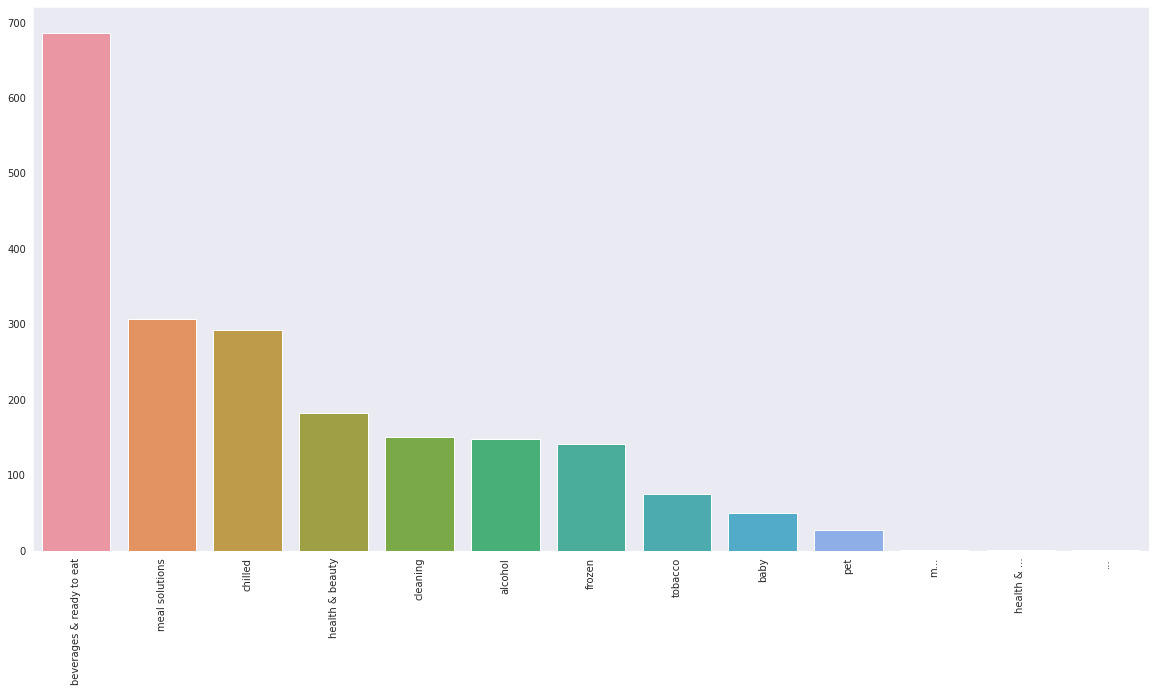

In [185]:
##Lets consider the top 20 items purchased freequently
r=df.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

We can find that bevarge and ready to eat  is the most purchased item from the store, we may advice that  bevarge and ready to eat must be always in the stock not only that mostly we can see from the above graph what 600 items are being frequently purchased.

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Tree map of top 20 items')

(0.0, 100.0, 0.0, 100.0)

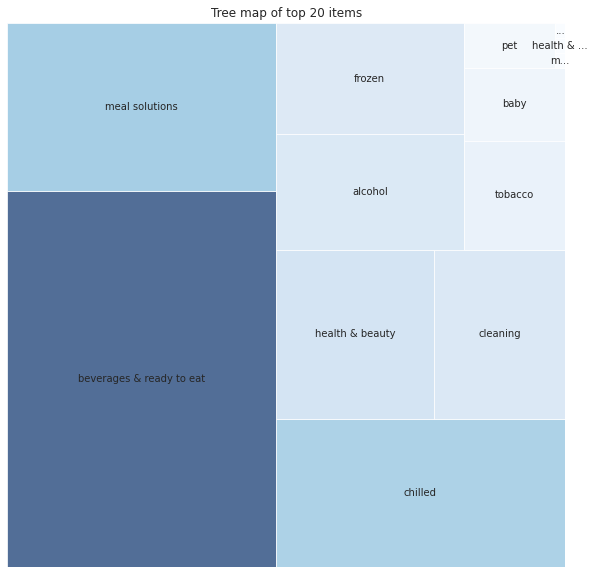

In [186]:
# create a color palette, mapped to these values
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#treemap of top 20 frequent items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

## Let's now work on apriori algorithm

In [187]:
from mlxtend.frequent_patterns import apriori

#Let us return items and ietmsets with atleast 5% support:

In [188]:
frequent_itemsets = apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.148,(alcohol)
1,0.050,(baby)
2,0.686,(beverages & ready to eat)
3,0.292,(chilled)
4,0.151,(cleaning)
5,0.142,(frozen)
6,0.182,(health & beauty)
7,0.307,(meal solutions)
8,0.075,(tobacco)
9,0.090,"(beverages & ready to eat, alcohol)"


This tell us that there are 24 frequent itemsets of different lengths , so the first step of our apriori algorithm is finished

##Now let's generate association rules

In [189]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cleaning),(chilled),0.151,0.292,0.086,0.569536,1.950467,0.041908,1.644738
1,(chilled),(cleaning),0.292,0.151,0.086,0.294521,1.950467,0.041908,1.203437
2,(chilled),(frozen),0.292,0.142,0.054,0.184932,1.302335,0.012536,1.052672
3,(frozen),(chilled),0.142,0.292,0.054,0.380282,1.302335,0.012536,1.142455
4,(health & beauty),(chilled),0.182,0.292,0.092,0.505495,1.731146,0.038856,1.431733
...,...,...,...,...,...,...,...,...,...
95,"(beverages & ready to eat, cleaning)","(meal solutions, health & beauty)",0.103,0.099,0.051,0.495146,5.001471,0.040803,1.784673
96,(meal solutions),"(beverages & ready to eat, health & beauty, cl...",0.307,0.062,0.051,0.166124,2.679416,0.031966,1.124867
97,(health & beauty),"(meal solutions, beverages & ready to eat, cle...",0.182,0.079,0.051,0.280220,3.547086,0.036622,1.279557
98,(beverages & ready to eat),"(meal solutions, health & beauty, cleaning)",0.686,0.056,0.051,0.074344,1.327572,0.012584,1.019817


Above we can see the 35 rules generated with lift greater than 1.3

Intuition we can get is that:

Above we can see the 35 rules generated with lift greater than 1.3

Intuition we can get is that:

    
     
   
   
    
1.  33% of transactions containing cleanning also contain health and beauty
2.  41% of transactions containing  health and beauty also contain cleaning
3.  58% of transactions containing cleaning also contain meal solution
4.  28% of transactions containing meal solution also contain cleaning

....and so on 

#Selecting and Filtering the Results

In [190]:
# frequent_itemsets.sort_values(by="support",ascending=False)

## Selecting and Filtering the Results

In [191]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.148,(alcohol),1
1,0.050,(baby),1
2,0.686,(beverages & ready to eat),1
3,0.292,(chilled),1
4,0.151,(cleaning),1
5,0.142,(frozen),1
6,0.182,(health & beauty),1
7,0.307,(meal solutions),1
8,0.075,(tobacco),1
9,0.090,"(beverages & ready to eat, alcohol)",2


### getting th item sets with length = 2 and support more han 10%


In [192]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
9,0.090,"(beverages & ready to eat, alcohol)",2
10,0.186,"(beverages & ready to eat, chilled)",2
11,0.103,"(beverages & ready to eat, cleaning)",2
12,0.096,"(beverages & ready to eat, frozen)",2
13,0.128,"(beverages & ready to eat, health & beauty)",2
14,0.199,"(meal solutions, beverages & ready to eat)",2
15,0.086,"(cleaning, chilled)",2
16,0.054,"(chilled, frozen)",2
17,0.092,"(health & beauty, chilled)",2
18,0.157,"(meal solutions, chilled)",2


### # getting th item sets with length = 2 and support more han 10%

In [193]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.148,(alcohol),1
1,0.050,(baby),1
2,0.686,(beverages & ready to eat),1
3,0.292,(chilled),1
4,0.151,(cleaning),1
5,0.142,(frozen),1
6,0.182,(health & beauty),1
7,0.307,(meal solutions),1
8,0.075,(tobacco),1


In [194]:
# from mlxtend.frequent_patterns import association_rules
# # rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.01)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

In [195]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alcohol),(beverages & ready to eat),0.148,0.686,0.090,0.608108,0.886455,-0.011528,0.801241
1,(chilled),(beverages & ready to eat),0.292,0.686,0.186,0.636986,0.928551,-0.014312,0.864981
2,(cleaning),(beverages & ready to eat),0.151,0.686,0.103,0.682119,0.994343,-0.000586,0.987792
3,(frozen),(beverages & ready to eat),0.142,0.686,0.096,0.676056,0.985505,-0.001412,0.969304
4,(health & beauty),(beverages & ready to eat),0.182,0.686,0.128,0.703297,1.025214,0.003148,1.058296
5,(meal solutions),(beverages & ready to eat),0.307,0.686,0.199,0.648208,0.944910,-0.011602,0.892574
6,(cleaning),(chilled),0.151,0.292,0.086,0.569536,1.950467,0.041908,1.644738
7,(health & beauty),(chilled),0.182,0.292,0.092,0.505495,1.731146,0.038856,1.431733
8,(meal solutions),(chilled),0.307,0.292,0.157,0.511401,1.751372,0.067356,1.449040
9,(chilled),(meal solutions),0.292,0.307,0.157,0.537671,1.751372,0.067356,1.498933


In [196]:
# rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
# rules

# Apriori Vs FP Growth

### Since FP-Growth doesn't require creating candidate sets explicitly, it can be magnitudes faster than the alternative Apriori algorithm. FP-Growth is about 5 times faster.Let's look at it.

In [197]:
frequent_itemset_fp_growth=fpgrowth(df,min_support=0.05,use_colnames=True)
frequent_itemset_fp_growth = frequent_itemset_fp_growth.sort_values(by="support",ascending=False)
frequent_itemset_fp_growth

,support,itemsets
0,0.686,(beverages & ready to eat)
5,0.307,(meal solutions)
4,0.292,(chilled)
22,0.199,"(meal solutions, beverages & ready to eat)"
19,0.186,"(beverages & ready to eat, chilled)"
3,0.182,(health & beauty)
20,0.157,"(meal solutions, chilled)"
6,0.151,(cleaning)
1,0.148,(alcohol)
2,0.142,(frozen)


In [198]:
res=association_rules(frequent_itemset_fp_growth,metric="lift",min_threshold=1)
res = res.sort_values(by="lift",ascending=False)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
113,"(beverages & ready to eat, cleaning)","(meal solutions, health & beauty)",0.103,0.099,0.051,0.495146,5.001471,0.040803,1.784673
108,"(meal solutions, health & beauty)","(beverages & ready to eat, cleaning)",0.099,0.103,0.051,0.515152,5.001471,0.040803,1.850062
117,(cleaning),"(meal solutions, health & beauty, beverages & ...",0.151,0.084,0.051,0.337748,4.020814,0.038316,1.383160
104,"(meal solutions, health & beauty, beverages & ...",(cleaning),0.084,0.151,0.051,0.607143,4.020814,0.038316,2.161091
110,"(meal solutions, cleaning)","(beverages & ready to eat, health & beauty)",0.100,0.128,0.051,0.510000,3.984375,0.038200,1.779592
...,...,...,...,...,...,...,...,...,...
25,"(meal solutions, cleaning)",(beverages & ready to eat),0.100,0.686,0.079,0.790000,1.151603,0.010400,1.495238
3,(health & beauty),(beverages & ready to eat),0.182,0.686,0.128,0.703297,1.025214,0.003148,1.058296
2,(beverages & ready to eat),(health & beauty),0.686,0.182,0.128,0.186589,1.025214,0.003148,1.005642
8,(beverages & ready to eat),"(meal solutions, chilled)",0.686,0.157,0.109,0.158892,1.012052,0.001298,1.002250


In [199]:
frequent_itemsets.sort_values(by="support",ascending=False)

,support,itemsets,length
2,0.686,(beverages & ready to eat),1
7,0.307,(meal solutions),1
3,0.292,(chilled),1
14,0.199,"(meal solutions, beverages & ready to eat)",2
10,0.186,"(beverages & ready to eat, chilled)",2
6,0.182,(health & beauty),1
18,0.157,"(meal solutions, chilled)",2
4,0.151,(cleaning),1
0,0.148,(alcohol),1
5,0.142,(frozen),1


We could observe that {meal solution,chilled}->{bevarage and ready to eat , cleaning} is mostly like to occur as we can observe it from the lift.

In [200]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(df,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.148,(alcohol)
1,0.050,(baby)
2,0.686,(beverages & ready to eat)
3,0.292,(chilled)
4,0.151,(cleaning)
...,...,...
122,0.016,"(frozen, meal solutions, cleaning, beverages &..."
123,0.041,"(meal solutions, cleaning, beverages & ready t..."
124,0.011,"(frozen, meal solutions, beverages & ready to ..."
125,0.010,"(frozen, meal solutions, cleaning, beverages &..."


,support,itemsets
0,0.148,(alcohol)
1,0.050,(baby)
2,0.686,(beverages & ready to eat)
3,0.292,(chilled)
4,0.151,(cleaning)
...,...,...
59,0.021,"(meal solutions, beverages & ready to eat, chi..."
60,0.056,"(meal solutions, health & beauty, beverages & ..."
61,0.051,"(meal solutions, health & beauty, beverages & ..."
62,0.044,"(meal solutions, health & beauty, cleaning, ch..."


,support,itemsets
0,0.148,(alcohol)
1,0.050,(baby)
2,0.686,(beverages & ready to eat)
3,0.292,(chilled)
4,0.151,(cleaning)
5,0.142,(frozen)
6,0.182,(health & beauty)
7,0.307,(meal solutions)
8,0.075,(tobacco)
9,0.090,"(beverages & ready to eat, alcohol)"


,support,itemsets
0,0.148,(alcohol)
1,0.050,(baby)
2,0.686,(beverages & ready to eat)
3,0.292,(chilled)
4,0.151,(cleaning)
5,0.142,(frozen)
6,0.182,(health & beauty)
7,0.307,(meal solutions)
8,0.075,(tobacco)
9,0.090,"(beverages & ready to eat, alcohol)"


,support,itemsets
0,0.148,(alcohol)
1,0.050,(baby)
2,0.686,(beverages & ready to eat)
3,0.292,(chilled)
4,0.151,(cleaning)
5,0.142,(frozen)
6,0.182,(health & beauty)
7,0.307,(meal solutions)
8,0.075,(tobacco)
9,0.090,"(beverages & ready to eat, alcohol)"


In [201]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(df,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.686,(beverages & ready to eat)
1,0.148,(alcohol)
2,0.142,(frozen)
3,0.182,(health & beauty)
4,0.292,(chilled)
...,...,...
122,0.013,"(meal solutions, cleaning, chilled, baby)"
123,0.013,"(baby, meal solutions, beverages & ready to ea..."
124,0.012,"(baby, meal solutions, cleaning, health & beau..."
125,0.011,"(baby, meal solutions, cleaning, beverages & r..."


,support,itemsets
0,0.686,(beverages & ready to eat)
1,0.148,(alcohol)
2,0.142,(frozen)
3,0.182,(health & beauty)
4,0.292,(chilled)
...,...,...
59,0.025,"(meal solutions, baby)"
60,0.024,"(beverages & ready to eat, chilled, baby)"
61,0.025,"(beverages & ready to eat, health & beauty, baby)"
62,0.020,"(beverages & ready to eat, cleaning, baby)"


,support,itemsets
0,0.686,(beverages & ready to eat)
1,0.148,(alcohol)
2,0.142,(frozen)
3,0.182,(health & beauty)
4,0.292,(chilled)
5,0.307,(meal solutions)
6,0.151,(cleaning)
7,0.075,(tobacco)
8,0.050,(baby)
9,0.090,"(beverages & ready to eat, alcohol)"


,support,itemsets
0,0.686,(beverages & ready to eat)
1,0.148,(alcohol)
2,0.142,(frozen)
3,0.182,(health & beauty)
4,0.292,(chilled)
5,0.307,(meal solutions)
6,0.151,(cleaning)
7,0.075,(tobacco)
8,0.050,(baby)
9,0.090,"(beverages & ready to eat, alcohol)"


,support,itemsets
0,0.686,(beverages & ready to eat)
1,0.148,(alcohol)
2,0.142,(frozen)
3,0.182,(health & beauty)
4,0.292,(chilled)
5,0.307,(meal solutions)
6,0.151,(cleaning)
7,0.075,(tobacco)
8,0.050,(baby)
9,0.090,"(beverages & ready to eat, alcohol)"


Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

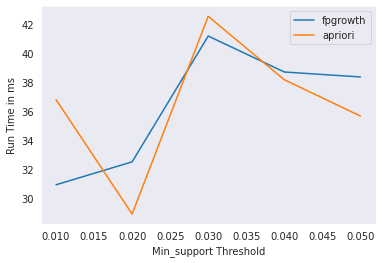

In [202]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

We can gain the required insights from the above graph about the run time comparision between the apriori and fpgrowth.